# Clustering Assignments

## 1. K-Means Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cereal.csv to cereal.csv


In [ ]:
# 1. Read in the cereal.csv file
df_cereal = pd.read_csv('cereal.csv')
df_cereal.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [ ]:
df_cereal.info(memory_usage='deep', show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cereal Name            74 non-null     object
 1   Manufacturer           74 non-null     object
 2   Calories               74 non-null     int64 
 3   Protein (g)            74 non-null     int64 
 4   Fat                    74 non-null     int64 
 5   Sugars                 74 non-null     int64 
 6   Vitamins and Minerals  74 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 13.0 KB


In [ ]:
# 2. Prep the data by dropping the name and manufacturer columns: aka only keep the numeric columns
df_cereal.drop(['Cereal Name', 'Manufacturer'], axis = 'columns', inplace= True)
df_cereal.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [ ]:
df_cereal[df_cereal.isna().any(axis = 1)]

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals


In [ ]:
df_cereal.dtypes

,0
Calories,int64
Protein (g),int64
Fat,int64
Sugars,int64
Vitamins and Minerals,int64


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

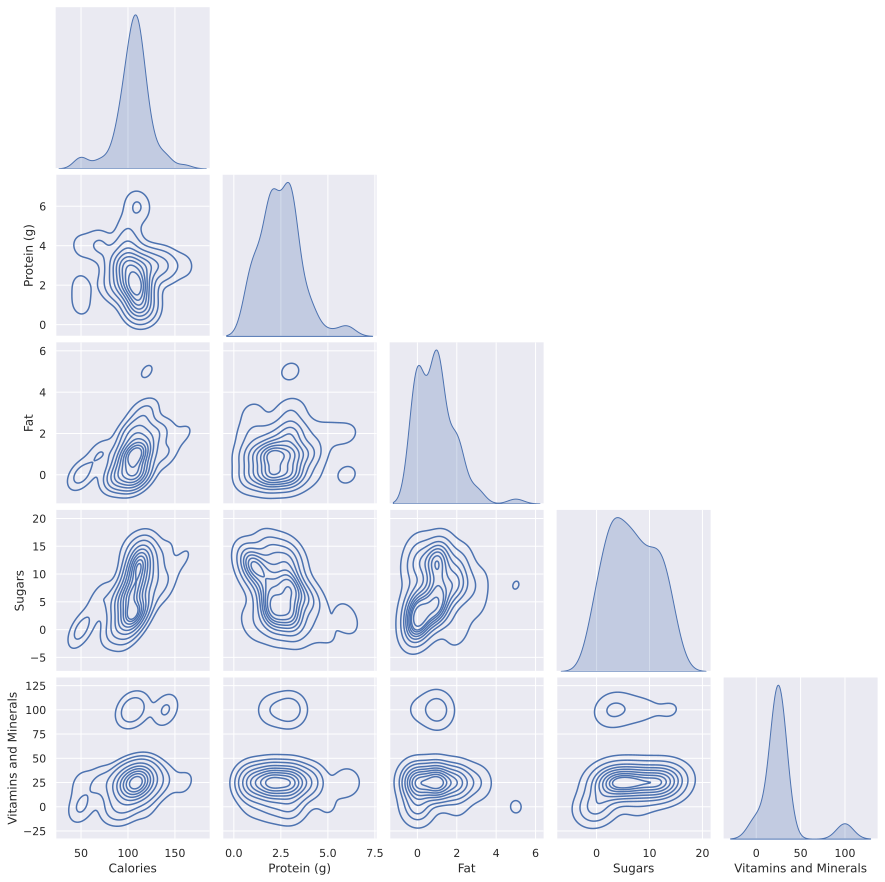

In [ ]:
sns.pairplot(df_cereal,
             kind = 'kde',
             corner= True,
             palette='bright');

In [ ]:
df_cereal.columns[1:]

Index(['Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals'], dtype='object')

In [ ]:
df_cereal.loc[: , df_cereal.columns[1:]]

,Protein (g),Fat,Sugars,Vitamins and Minerals
0,4,1,6,25
1,3,5,8,0
2,4,1,5,25
3,4,0,0,25
4,2,2,8,25
...,...,...,...,...
69,2,1,3,25
70,1,1,12,25
71,3,1,3,25
72,3,1,3,25


In [ ]:
 df_cereal.columns[:1]

Index(['Calories'], dtype='object')

In [ ]:
df_cereal.loc[: , df_cereal.columns[:1]]

,Calories
0,70
1,120
2,70
3,50
4,110
...,...
69,110
70,110
71,100
72,100


In [ ]:
# normalization for Protein, Fat , Sugars, Vitamin and Minerals:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
normalized = mm_scaler.fit_transform(df_cereal.loc[: , df_cereal.columns[1:]]) #['Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals']
df_normalized = pd.DataFrame(normalized , columns= df_cereal.columns[1:].to_list())
df_normalized.head()

,Protein (g),Fat,Sugars,Vitamins and Minerals
0,0.6,0.2,0.4375,0.25
1,0.4,1.0,0.5625,0.00
2,0.6,0.2,0.3750,0.25
3,0.6,0.0,0.0625,0.25
4,0.2,0.4,0.5625,0.25


In [ ]:
# Standardization of Calories:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(df_cereal.loc[: , df_cereal.columns[:1]]) #'Calories'
df_standardized = pd.DataFrame(standardized , columns= df_cereal.columns[:1].to_list() )
df_standardized.head()

,Calories
0,-1.940286
1,0.789394
2,-1.940286
3,-3.032158
4,0.243458


In [ ]:
cereal_model_df = pd.concat([df_standardized , df_normalized],
                            axis = 'columns')
cereal_model_df.head(10)

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,-1.940286,0.6,0.2,0.4375,0.25
1,0.789394,0.4,1.0,0.5625,0.00
2,-1.940286,0.6,0.2,0.3750,0.25
3,-3.032158,0.6,0.0,0.0625,0.25
4,0.243458,0.2,0.4,0.5625,0.25
5,0.243458,0.2,0.4,0.6875,0.25
6,0.243458,0.2,0.0,0.9375,0.25
7,1.335330,0.4,0.4,0.5625,0.25
8,-0.848414,0.2,0.2,0.4375,0.25
9,-0.848414,0.4,0.0,0.3750,0.25


In [ ]:
# 3. Fit a K-Means Clustering model with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2 , n_init= 'auto' , random_state= 2025)
kmeans.fit(cereal_model_df)

KMeans(n_clusters=2, random_state=2025)

In [ ]:
kmeans.feature_names_in_

array(['Calories', 'Protein (g)', 'Fat', 'Sugars',
       'Vitamins and Minerals'], dtype=object)

In [ ]:
kmeans.n_features_in_

5

In [ ]:
kmeans.cluster_centers_

array([[ 0.57846406,  0.25      ,  0.24090909,  0.60511364,  0.3125    ],
       [-0.84841395,  0.37333333,  0.11333333,  0.31041667,  0.24166667]])

In [ ]:
kmeans.labels_

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

In [ ]:
clusters2 = pd.Series(kmeans.labels_ , name = 'Cluster2')

In [ ]:
df = pd.concat([cereal_model_df , clusters2], axis = 'columns')
df.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,Cluster2
0,-1.940286,0.6,0.2,0.4375,0.25,1
1,0.789394,0.4,1.0,0.5625,0.00,0
2,-1.940286,0.6,0.2,0.3750,0.25,1
3,-3.032158,0.6,0.0,0.0625,0.25,1
4,0.243458,0.2,0.4,0.5625,0.25,0


In [ ]:
cluster1 = df.loc[df.Cluster2 == 1]
cluster0 = df.loc[df.Cluster2 == 0]

In [ ]:
cluster1.mean()

,0
Calories,-0.848414
Protein (g),0.373333
Fat,0.113333
Sugars,0.310417
Vitamins and Minerals,0.241667
Cluster,1.000000


In [ ]:
cluster1.columns[:-1].tolist()

['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals']

In [ ]:
cluster0.loc[: ,cluster0.columns[:-1].tolist()].mean()

,0
Calories,0.578464
Protein (g),0.250000
Fat,0.240909
Sugars,0.605114
Vitamins and Minerals,0.312500


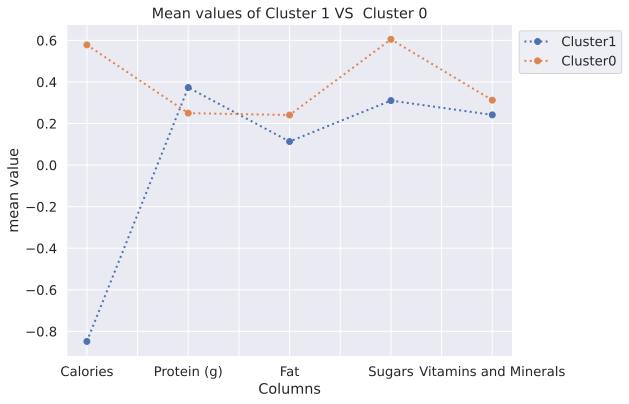

In [ ]:
sns.set(font_scale = 1.2)
cluster1.loc[: ,cluster1.columns[:-1].tolist()].mean().plot(figsize = (8,6),
                                                            marker = 'o',
                                                            linestyle = ':',
                                                            label = 'Cluster1',
                                                            linewidth = 2 )
cluster0.loc[: ,cluster0.columns[:-1].tolist()].mean().plot(figsize = (8,6) ,
                                                            marker = 'o',
                                                            linestyle = ':',
                                                            linewidth = 2,
                                                            label = 'Cluster0' )
#plt.plot(kmeans.cluster_centers_ , marker = 'o')
plt.title("Mean values of Cluster 1 VS  Cluster 0")
plt.xlabel("Columns")
plt.ylabel("mean value")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [ ]:
df.columns[:-1]

Index(['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals'], dtype='object')

In [ ]:
# 4. Interpret the cluster centers
cluster_centers2 = pd.DataFrame(kmeans.cluster_centers_ , columns = df.columns[:-1].tolist())
cluster_centers2.index = ['Cluster_0', 'Cluster_1']
cluster_centers2

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
Cluster_0,0.578464,0.250000,0.240909,0.605114,0.312500
Cluster_1,-0.848414,0.373333,0.113333,0.310417,0.241667


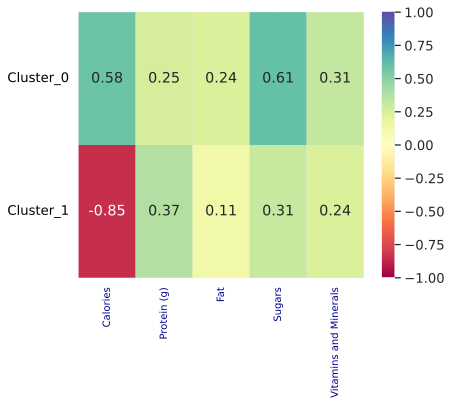

In [ ]:
sns.heatmap(data = cluster_centers2 ,
            annot = True,
            cmap = 'Spectral',
            vmin = -1,
            vmax = +1)
plt.yticks(rotation = 0, color= 'black')
plt.xticks(rotation = 90,fontsize = 10, color='darkblue')
plt.show()

In [ ]:
# cluster 0: cereals with high level of  sugars and calories
# cluster 1: cereals lowest amount of calories

## 2. Inertia Plot

In [ ]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertia_values = []
for k in range(2,15+1):
  kmeans_k = KMeans(n_clusters= k ,
                    n_init= 'auto',
                    random_state= 2025_07,)
  kmeans_k.fit(cereal_model_df)
  inertia_values.append(kmeans_k.inertia_)
inertia_values

[51.13586758579888,
 33.05697064357058,
 20.543952012712776,
 18.278946716540027,
 15.905225019627913,
 15.163001950718945,
 12.341506937755728,
 11.73018662525573,
 10.076805630839099,
 8.110397587298989,
 6.8355328494128305,
 6.023168470542416,
 5.577001803875748,
 4.5724675420639285]

In [ ]:
inertia_series = pd.Series(inertia_values , index= range(2,15+1), name = 'Inertia')
inertia_series

,Inertia
2,51.135868
3,33.056971
4,20.543952
5,18.278947
6,15.905225
7,15.163002
8,12.341507
9,11.730187
10,10.076806
11,8.110398


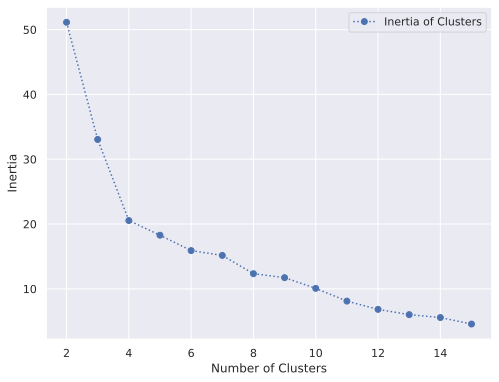

In [ ]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis
inertia_series.plot(marker = 'o',
                    figsize = (8,6),
                    label = "Inertia of Clusters",
                    linestyle = ':')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.legend()
plt.show()

In [ ]:
# 3. Identify the elbow of the plot
elbow = 3

In [ ]:
# 5. Interpret the cluster centers using a heat map
cluster_centers_elbow = pd.DataFrame(kmeans_elbow.cluster_centers_ , columns = df.columns[:-1].tolist() )
cluster_centers_elbow

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,0.676995,0.217647,0.282353,0.715074,0.308824
1,-0.286880,0.365714,0.114286,0.303571,0.278571
2,-2.595409,0.400000,0.080000,0.200000,0.150000


In [ ]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans_elbow = KMeans(n_clusters= elbow , n_init= 'auto', random_state= 2025_07)
kmeans_elbow.fit(cereal_model_df)
kmeans_elbow.labels_

array([2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0], dtype=int32)

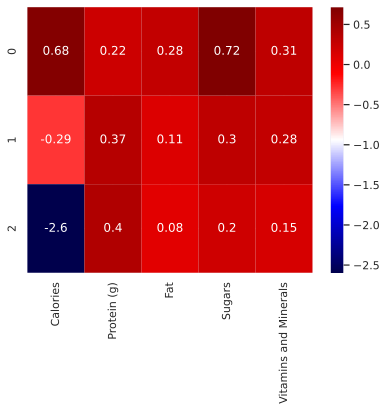

In [ ]:
sns.heatmap(data = cluster_centers_elbow ,
            annot = True ,
            cmap ='seismic');

In [ ]:
kmeans3 = KMeans(n_clusters= 3 ,
                 n_init= 'auto',
                 random_state= 2025_07)
kmeans3.fit(cereal_model_df)
kmeans3.labels_

array([2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
np.unique(kmeans3.labels_)

array([0, 1, 2], dtype=int32)

In [ ]:
np.unique(kmeans3.labels_)
kmeans3_cluster_centers = pd.DataFrame(kmeans3.cluster_centers_ ,
             columns= cereal_model_df.columns,  index = np.unique(kmeans3.labels_))
kmeans3_cluster_centers

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,0.676995,0.217647,0.282353,0.715074,0.308824
1,-0.286880,0.365714,0.114286,0.303571,0.278571
2,-2.595409,0.400000,0.080000,0.200000,0.150000


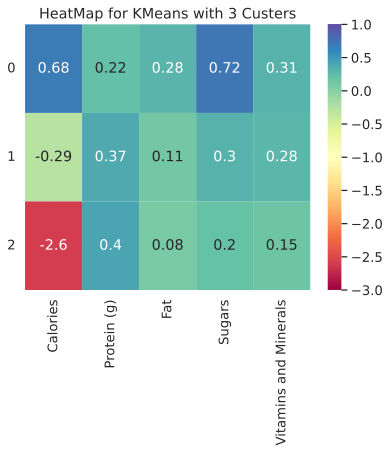

In [ ]:
sns.heatmap(kmeans3_cluster_centers ,
            cmap = 'Spectral',
            vmin = -3,
            vmax = 1,
            annot = True)
plt.title('HeatMap for KMeans with 3 Custers')
plt.yticks(rotation = 0)
plt.show()

In [ ]:
model_3Clusters = (pd.Series(kmeans3.labels_ , name = 'Model_3_Clusters').
                   map({0:'Typical Cereals', 1 : 'Hearty Cereals' , 2: 'Empty Cereals'}))
model_3Clusters

,Model_3_Clusters
0,Empty Cereals
1,Typical Cereals
2,Empty Cereals
3,Empty Cereals
4,Typical Cereals
...,...
69,Hearty Cereals
70,Typical Cereals
71,Hearty Cereals
72,Hearty Cereals


In [ ]:
kmeans6 = KMeans(n_clusters= 6 ,
                 n_init= 'auto',
                 random_state= 2025_08)
kmeans6.fit(cereal_model_df)
kmeans6.labels_

array([1, 5, 1, 1, 0, 0, 0, 5, 3, 3, 5, 4, 5, 4, 0, 4, 3, 0, 0, 4, 3, 4,
       3, 3, 0, 0, 3, 5, 0, 0, 0, 3, 4, 5, 5, 0, 0, 4, 2, 4, 3, 0, 3, 2,
       3, 5, 2, 3, 5, 5, 3, 1, 1, 3, 3, 5, 3, 3, 4, 4, 3, 3, 3, 0, 4, 3,
       4, 2, 3, 4, 0, 3, 3, 0], dtype=int32)

In [ ]:
np.unique(kmeans6.labels_)
kmeans6_cluster_centers = pd.DataFrame(kmeans6.cluster_centers_ ,
             columns= cereal_model_df.columns,  index = np.unique(kmeans6.labels_))
kmeans6_cluster_centers

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,0.211344,0.117647,0.164706,0.790441,0.250000
1,-2.595409,0.400000,0.080000,0.200000,0.150000
2,2.154234,0.400000,0.300000,0.734375,0.625000
3,-0.507204,0.375000,0.125000,0.304687,0.260417
4,0.243458,0.353846,0.169231,0.288462,0.365385
5,0.888655,0.272727,0.400000,0.681818,0.227273


In [ ]:
kmeans6_cluster_centers.index = ['High Sugars','Low Calories','High Calories','Typical Low Calories','Typical Cereals',
                                 'High Calories & High Sugars']

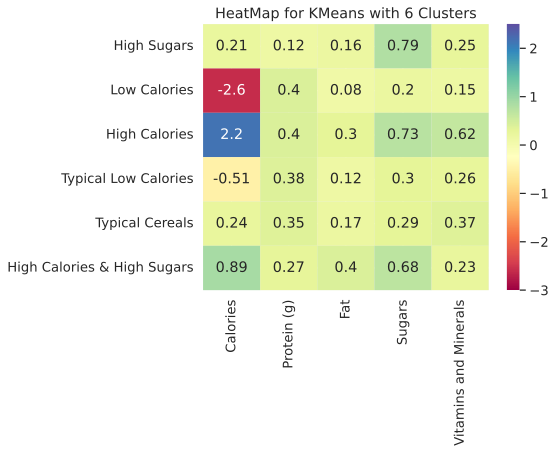

In [ ]:
sns.heatmap(kmeans6_cluster_centers,
            cmap ='Spectral',
            annot = True,
            vmin = -3,
            vmax = 2.5
            )
plt.title('HeatMap for KMeans with 6 Clusters')
plt.yticks(rotation = 0)
plt.show()

In [ ]:
kmeans6.labels_

array([1, 5, 1, 1, 0, 0, 0, 5, 3, 3, 5, 4, 5, 4, 0, 4, 3, 0, 0, 4, 3, 4,
       3, 3, 0, 0, 3, 5, 0, 0, 0, 3, 4, 5, 5, 0, 0, 4, 2, 4, 3, 0, 3, 2,
       3, 5, 2, 3, 5, 5, 3, 1, 1, 3, 3, 5, 3, 3, 4, 4, 3, 3, 3, 0, 4, 3,
       4, 2, 3, 4, 0, 3, 3, 0], dtype=int32)

In [ ]:
model_6Clusters = pd.Series(kmeans6.labels_ , name = 'Model_6Clusters').map({0 : 'High Sugars',
                                                                             1:'Low Calories',
                                                                             2: 'High Calories',
                                                                             3: 'Typical Low Calories',
                                                                             4: 'Typical Cereals',
                                                                             5: 'High Calories & High Sugars'})
model_6Clusters

,Model_6Clusters
0,Low Calories
1,High Calories & High Sugars
2,Low Calories
3,Low Calories
4,High Sugars
...,...
69,Typical Cereals
70,High Sugars
71,Typical Low Calories
72,Typical Low Calories


## 3. Tune the K-Means Model

In [ ]:
cereal_model_df.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,0.6,0.4375,0.25
1,0.789394,0.4,0.5625,0.00
2,-1.940286,0.6,0.3750,0.25
3,-3.032158,0.6,0.0625,0.25
4,0.243458,0.2,0.5625,0.25


In [ ]:
# 1. Remove the ”Fat” column
cereal_model_df.drop(labels = ['Fat'], axis = 'columns', inplace = True)

In [ ]:
cereal_model_df.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,0.6,0.4375,0.25
1,0.789394,0.4,0.5625,0.00
2,-1.940286,0.6,0.3750,0.25
3,-3.032158,0.6,0.0625,0.25
4,0.243458,0.2,0.5625,0.25


In [ ]:
# 2. Standardize the remaining columns


In [ ]:
# 3a. Write a loop to fit K-Means Clustering models with 2 to 15 clusters


In [ ]:
# 3b. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis


In [ ]:
# 3c. Identify the elbow of the plot


In [ ]:
# 3d. Fit a K-Means Clustering model on the specific number of clusters at the elbow


In [ ]:
# 3e. Interpret the cluster centers using a heat map


## 4. Select the Best K-Means Model

In [ ]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model


In [ ]:
# 2. Look at the number of cereals that fall into each cluster
model_3Clusters.value_counts()

,count
Model_3_Clusters,
Hearty Cereals,35
Typical Cereals,34
Empty Cereals,5


In [ ]:
model_6Clusters.value_counts()

,count
Model_6Clusters,
Typical Low Calories,24
High Sugars,17
Typical Cereals,13
High Calories & High Sugars,11
Low Calories,5
High Calories,4


In [ ]:
# 3. Decide on the best model for our client


In [ ]:
# 4. Recommend a specific number of displays


In [ ]:
# 5. Suggest a few cereals that should be shown in each display
cluster_names = pd.concat([cereal_model_df , model_3Clusters ,model_6Clusters] , axis = 'columns')
cluster_names

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,Model_3_Clusters,Model_6Clusters
0,-1.940286,0.6,0.2,0.4375,0.25,Empty Cereals,Low Calories
1,0.789394,0.4,1.0,0.5625,0.00,Typical Cereals,High Calories & High Sugars
2,-1.940286,0.6,0.2,0.3750,0.25,Empty Cereals,Low Calories
3,-3.032158,0.6,0.0,0.0625,0.25,Empty Cereals,Low Calories
4,0.243458,0.2,0.4,0.5625,0.25,Typical Cereals,High Sugars
...,...,...,...,...,...,...,...
69,0.243458,0.2,0.2,0.2500,0.25,Hearty Cereals,Typical Cereals
70,0.243458,0.0,0.2,0.8125,0.25,Typical Cereals,High Sugars
71,-0.302478,0.4,0.2,0.2500,0.25,Hearty Cereals,Typical Low Calories
72,-0.302478,0.4,0.2,0.2500,0.25,Hearty Cereals,Typical Low Calories


## 5. Hierarchical Clustering

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%config InlineBackened.format_figure = 'svg'

In [ ]:
from google.colab import files
uploaded_fle = files.upload()

Saving cereal.csv to cereal (1).csv


In [ ]:
df = pd.read_csv('cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cereal Name            74 non-null     object
 1   Manufacturer           74 non-null     object
 2   Calories               74 non-null     int64 
 3   Protein (g)            74 non-null     int64 
 4   Fat                    74 non-null     int64 
 5   Sugars                 74 non-null     int64 
 6   Vitamins and Minerals  74 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 13.0 KB


In [ ]:
df.nunique()

,0
Cereal Name,74
Manufacturer,7
Calories,10
Protein (g),6
Fat,5
Sugars,17
Vitamins and Minerals,3


In [ ]:
df.drop(['Cereal Name', 'Manufacturer'], axis = 1 , inplace= True)

In [ ]:
df.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


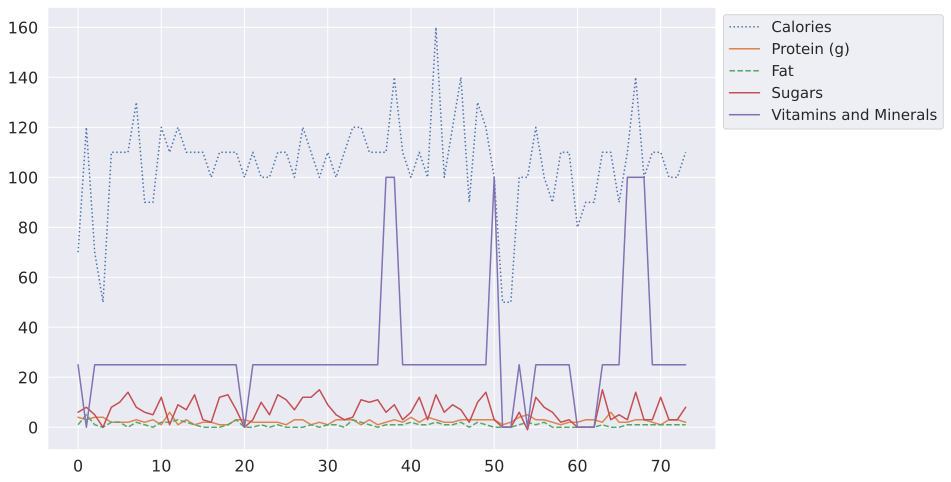

In [ ]:
df.select_dtypes(include = 'number').plot(kind = 'line',
                                          figsize=(12,8),
                                          fontsize = 16,
                                          style = [':',"-","--"]
                                          )
plt.legend(bbox_to_anchor = (1,1), fontsize = 15)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

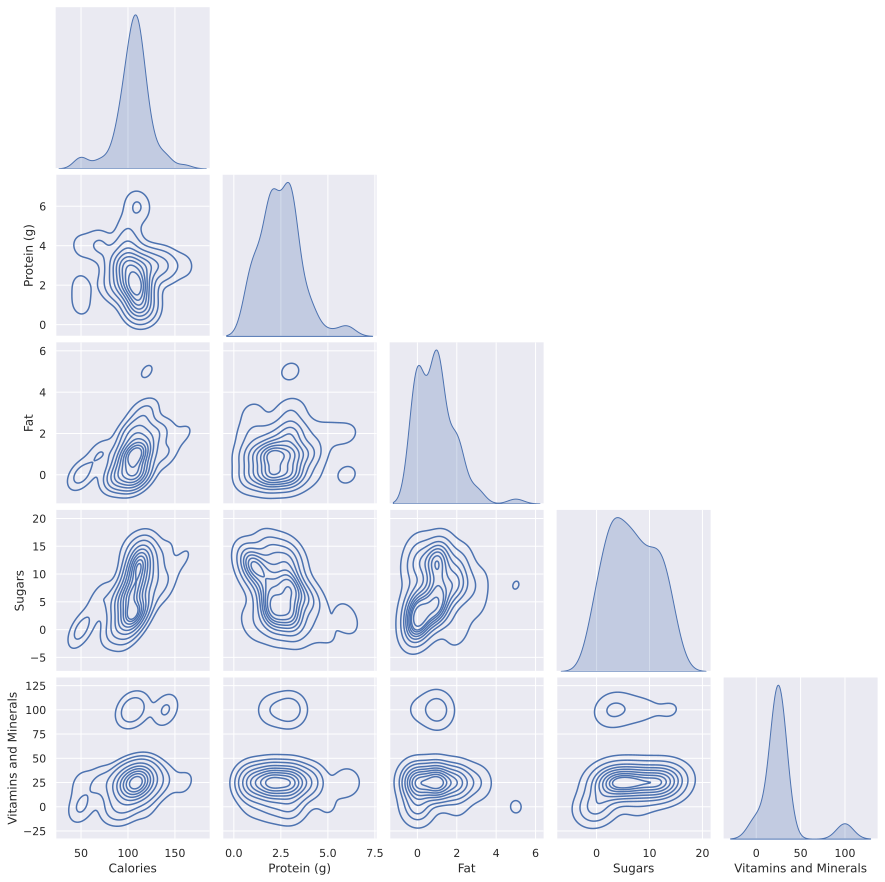

In [ ]:
sns.pairplot(df, corner = True, kind = 'kde',palette='viridis')
plt.show()

In [ ]:
model_df = df.drop(['Cereal Name', 'Manufacturer'], axis = 1)

In [ ]:
model_df.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [ ]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set


In [ ]:
# dendrogram with scipy
from scipy.cluster.hierarchy import linkage , dendrogram

linkage_matrix = linkage( y  = model_df, method = 'ward')
dendrogran_info = dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.show()

In [ ]:
# dendrogram with sklearn
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

In [ ]:
agg = AgglomerativeClustering(n_clusters = 5 ,
                              metric = 'euclidean',
                              linkage='ward')
agg.fit(model_df)

AgglomerativeClustering(n_clusters=5)

In [ ]:
agg.labels_

array([2, 3, 2, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 0, 0, 0, 0, 3,
       0, 3, 3, 0, 3, 3, 1, 2, 2, 0, 4, 3, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
Counter(agg.labels_)

Counter({np.int64(2): 5,
         np.int64(3): 13,
         np.int64(0): 45,
         np.int64(4): 5,
         np.int64(1): 6})

In [ ]:
pd.Series(agg.labels_).value_counts()

,count
0,45
3,13
1,6
2,5
4,5


In [ ]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold
from sklearn.cluster import KMeans

In [ ]:
inetria_list = []
for k in range(2,15+1):
  kmeans = KMeans(n_clusters= k , n_init = 'auto', random_state=202508)
  kmeans.fit(model_df)
  inetria_list.append(kmeans.inertia_)

inetria_list

[30041.73039215686,
 16768.9703962704,
 11876.491666666661,
 9511.031135531133,
 7015.898148148149,
 6028.398148148148,
 3893.8666666666677,
 3352.5108695652175,
 2734.677536231884,
 1968.4609625668445,
 1677.2109625668447,
 1364.069295900178,
 988.213752913753,
 913.8584415584418]

In [ ]:
inertia_Series = pd.Series(inetria_list ,
                           index = range(2,15+1))

In [ ]:
import numpy as np

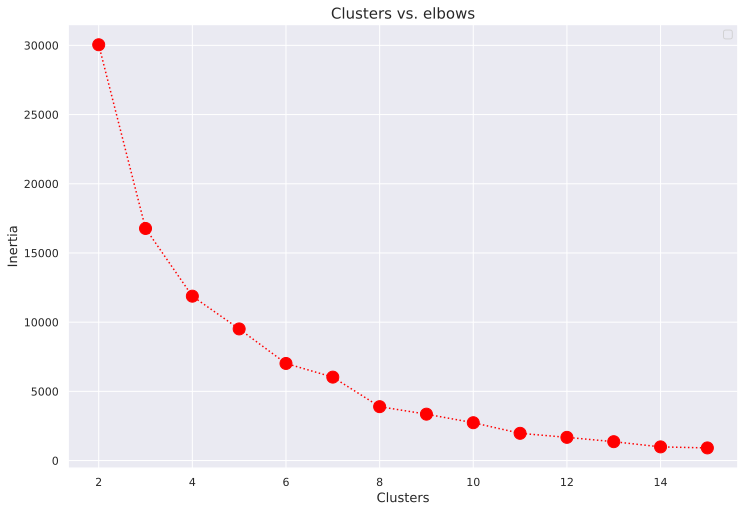

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(inertia_Series,
         marker ='o',
         linestyle =":",
         color  = 'red',
         markersize = 12
         )
plt.title("Clusters vs. elbows", fontsize = 15)
plt.xlabel("Clusters", fontsize = 13)
plt.ylabel("Inertia", fontsize = 13)
plt.legend("")
plt.show()

In [ ]:
kmeans_4 = KMeans(n_clusters= 4 , random_state= 20250802)
kmeans_4.fit(model_df.drop(["Fat"], axis = 1))

KMeans(n_clusters=4, random_state=20250802)

In [ ]:
kmeans_4.cluster_centers_

array([[ 61.66666667,   2.83333333,   1.83333333,  12.5       ],
       [116.77419355,   2.03225806,  10.51612903,  24.19354839],
       [116.66666667,   2.66666667,   6.33333333, 100.        ],
       [100.64516129,   2.87096774,   4.06451613,  21.77419355]])

In [ ]:
['cluster_'+ str(i) for i in range(4)]

['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3']

In [ ]:
cluster_centers_4 = pd.DataFrame(data = kmeans_4.cluster_centers_,
                                 columns = model_df.drop(['Fat'], axis = 1).columns,
                                 index = ['cluster_'+ str(i) for i in range(4)])
cluster_centers_4

,Calories,Protein (g),Sugars,Vitamins and Minerals
cluster_0,61.666667,2.833333,1.833333,12.500000
cluster_1,116.774194,2.032258,10.516129,24.193548
cluster_2,116.666667,2.666667,6.333333,100.000000
cluster_3,100.645161,2.870968,4.064516,21.774194


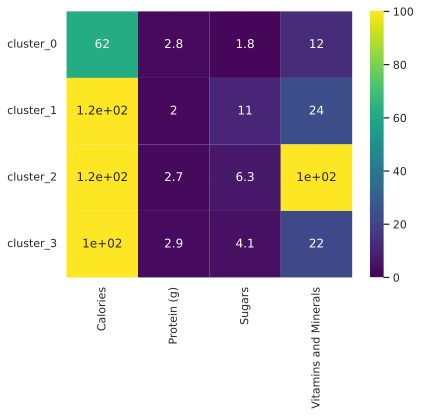

In [ ]:
sns.heatmap(cluster_centers_4,
            cmap = 'viridis',
            vmin = 0 ,
            fmt = '.2g',
            vmax = 100,
            annot = True
          )
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
kmeans_4.labels_

array([0, 1, 0, 0, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 2, 2, 3, 3, 1, 3, 1,
       3, 1, 1, 3, 1, 1, 2, 0, 0, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3,
       2, 2, 2, 3, 1, 3, 3, 1], dtype=int32)

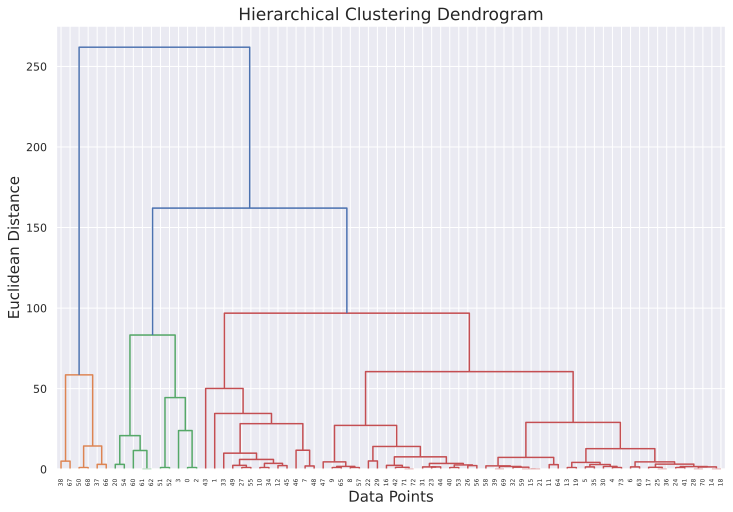

In [ ]:
# 3. Create a dendrogram using the 4 numeric, standardized fields (excluding “Fat”) of the cereal data set
# dendrogram with scipy
from scipy.cluster.hierarchy import linkage , dendrogram
plt.figure(figsize=(12,8))
linkage_matrix = linkage( y  = model_df, method = 'ward')
dendrogran_info = dendrogram(linkage_matrix, color_threshold= 100)
plt.title("Hierarchical Clustering Dendrogram",fontsize = 17)
plt.xlabel("Data Points", fontsize = 15)
plt.ylabel("Euclidean Distance",fontsize = 15)
plt.show()

In [ ]:
linkage(model_df , method='ward')

array([[ 61.        ,  62.        ,   0.        ,   2.        ],
       [ 28.        ,  70.        ,   0.        ,   2.        ],
       [ 25.        ,  36.        ,   0.        ,   2.        ],
       [ 39.        ,  69.        ,   0.        ,   2.        ],
       [ 14.        ,  18.        ,   0.        ,   2.        ],
       [ 15.        ,  21.        ,   0.        ,   2.        ],
       [ 59.        ,  79.        ,   0.        ,   3.        ],
       [ 71.        ,  72.        ,   0.        ,   2.        ],
       [  0.        ,   2.        ,   1.        ,   2.        ],
       [ 10.        ,  34.        ,   1.        ,   2.        ],
       [ 27.        ,  55.        ,   1.        ,   2.        ],
       [ 13.        ,  19.        ,   1.        ,   2.        ],
       [  4.        ,  73.        ,   1.        ,   2.        ],
       [ 24.        ,  41.        ,   1.        ,   2.        ],
       [ 40.        ,  53.        ,   1.        ,   2.        ],
       [  9.        ,  65

In [ ]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold


In [ ]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4 ,
                              metric = 'euclidean',
                              linkage='ward')
agg.fit(model_df)


AgglomerativeClustering(n_clusters=4)

In [ ]:
agg.labels_

array([0, 3, 0, 0, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2, 3,
       2, 3, 3, 2, 3, 3, 1, 0, 0, 2, 0, 3, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2])

In [ ]:
pd.Series(agg.labels_).value_counts()

,count
2,45
3,13
0,10
1,6


/tmp/ipython-input-3118017225.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor = (1,1))


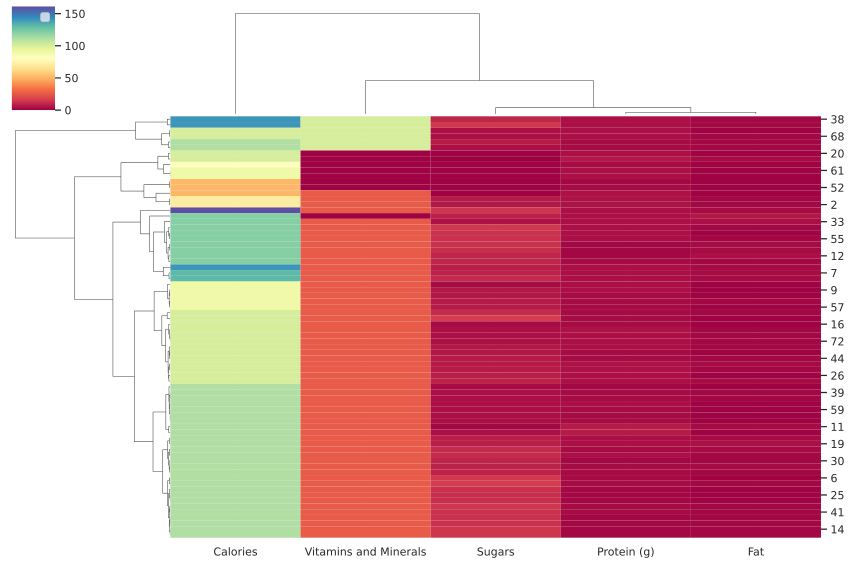

In [ ]:
# 6. Create a cluster map of the “best” results and interpret the clusters
sns.clustermap(model_df ,
               method='ward',
               cmap = 'Spectral',
               figsize = (12,8),
               xticklabels = model_df.columns)

plt.show()

In [ ]:
Data_Point = pd.Series(pd.Series(agg.labels_).value_counts() , name = 'Data_Point').astype('int')
Data_Point

,Data_Point
2,45
3,13
0,10
1,6


In [ ]:
from scipy.cluster.hierarchy import fcluster

den_clusters = pd.Series(fcluster(linkage_matrix , 4 , criterion='distance'),
                         name = 'Dendrogram Cluster')
den_clusters.head()

,Dendrogram Cluster
0,9
1,16
2,9
3,10
4,27


In [ ]:
den_clusters_df = den_clusters.reset_index()
den_clusters_df.columns = ['Data_Point', 'Dendrogram Cluster']
den_clusters_df.sort_values(['Data_Point', 'Dendrogram Cluster'])

,Data_Point,Dendrogram Cluster
0,0,9
1,1,16
2,2,9
3,3,10
4,4,27
...,...,...
69,69,24
70,70,29
71,71,22
72,72,22


## 6. DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
len(set([1,0,-1])) -(1 if -1 in labels2 else 0)

2

In [ ]:
labels2  = [-1,0,1]
(1 if -1 in labels2 else 0)

int

In [ ]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models
def dbscan(data):
  from sklearn.cluster import DBSCAN
  from sklearn.metrics import silhouette_score
  import pandas as pd
  import numpy as np
  results = []
  EPS = np.arange(0.1,2,0.1)
  MIN_Sample = np.arange(2,10,1)
  for epsilon in EPS:
    for min_sam in MIN_Sample:
      dbscan = DBSCAN(eps = epsilon , min_samples= min_sam)
      dbscan.fit(data)
      labels = dbscan.labels_
      n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
      n_noise = list(labels).count(-1)

      if n_cluster > 1:
        silhouette = silhouette_score(data , labels , metric = 'euclidean', sample_size= None)
      else:
        silhouette = None


      results.append([epsilon , min_sam , n_cluster , n_noise  , silhouette])

  dbscan_results = pd.DataFrame(results ,
                                columns= ['EPS', 'Min_Samples', 'Number of Clusters' , 'Number of Noise Points', 'Silhouette Score'])
  dbscan_results.sort_values(['Silhouette Score'], ascending= False, inplace = True)



  return dbscan_results


In [ ]:
dbscan(df_cereal)

,EPS,Min_Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,12,23,0.230822
144,1.9,2,12,23,0.230822
120,1.6,2,13,25,0.154347
112,1.5,2,13,25,0.154347
128,1.7,2,13,25,0.154347
...,...,...,...,...,...
135,1.7,9,1,65,NaN
142,1.8,8,1,64,NaN
143,1.8,9,1,65,NaN
150,1.9,8,1,64,NaN


In [ ]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan2(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
          dbscan = DBSCAN(eps=eps, min_samples=min_samples)
          dbscan.fit(data)
          labels = dbscan.labels_

          # count the number of clusters (excluding noise points labeled as -1)
          n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

          # count the number of noise points (labeled as -1)
          n_noise = list(labels).count(-1)

          # calculate the silhouette score (excluding noise points)
          if n_clusters > 1:  # silhouette score requires at least 2 clusters
              silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
          else:
              silhouette = None

          results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results2 = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results2

In [ ]:
df_cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Calories               74 non-null     int64
 1   Protein (g)            74 non-null     int64
 2   Fat                    74 non-null     int64
 3   Sugars                 74 non-null     int64
 4   Vitamins and Minerals  74 non-null     int64
dtypes: int64(5)
memory usage: 3.0 KB


In [ ]:
sil_score_table = dbscan(df_cereal).groupby(['Silhouette Score']).head(1)
#sil_score_table.loc[: , ['Silhouette Score','Number of Clusters']].plot()
# plt.plot()
# plt.legend()
# plt.show()

In [ ]:
df_final = sil_score_table.loc[: , ['Silhouette Score','Number of Clusters']]#.reset_index(inplace = True)
df_final.reset_index(drop=True, inplace= True)

In [ ]:
df_final = df_final[['Number of Clusters', 'Silhouette Score']]
df_final = df_final.sort_values('Number of Clusters', ascending= False)
df_final

,Number of Clusters,Silhouette Score
1,13,0.154347
4,13,0.051047
0,12,0.230822
12,7,-0.302829
5,6,0.031516
2,6,0.085334
3,6,0.074636
8,4,-0.150983
7,4,-0.093904
6,4,-0.063081


from matplotlib import pyplot as plt
df_final['Number of Clusters'].plot(kind='hist', bins=20, title='Number of Clusters')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final['Silhouette Score'].plot(kind='hist', bins=20, title='Silhouette Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final.plot(kind='scatter', x='Number of Clusters', y='Silhouette Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_final['Number of Clusters'].plot(kind='line', figsize=(8, 4), title='Number of Clusters')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_final['Silhouette Score'].plot(kind='line', figsize=(8, 4), title='Silhouette Score')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-3891114202.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor = (1.4,1))


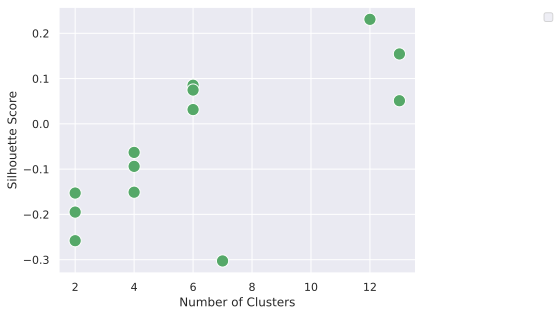

In [ ]:
sns.scatterplot(df_final , x = 'Number of Clusters' , y = 'Silhouette Score', s = 150, c= 'g' )

plt.legend(bbox_to_anchor = (1.4,1))
plt.show()

/tmp/ipython-input-3225934379.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor = (1.4,1))


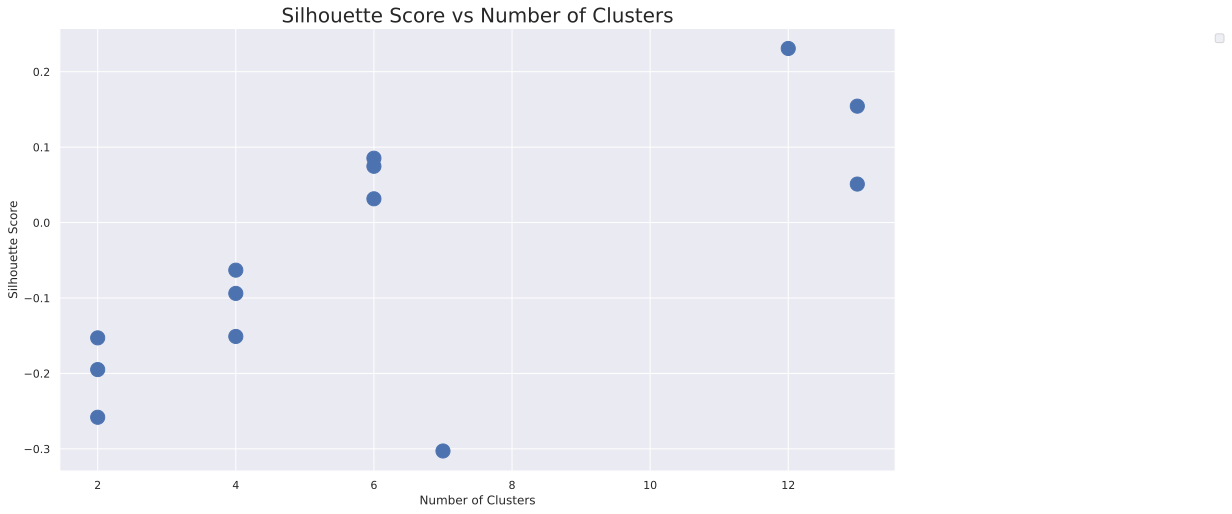

In [ ]:
df_final.plot.scatter(x = 'Number of Clusters' , y = 'Silhouette Score'  , s = 200, figsize = (15,8))
plt.title("Silhouette Score vs Number of Clusters" , fontsize = 20)
plt.legend(bbox_to_anchor = (1.4,1))


plt.show()

In [ ]:
tune_dbscan2(df_cereal)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,7,59,-0.302829
1,0.1,3,1,71,NaN
2,0.1,4,0,74,NaN
3,0.1,5,0,74,NaN
4,0.1,6,0,74,NaN
...,...,...,...,...,...
147,1.9,5,4,46,-0.063081
148,1.9,6,2,57,-0.152856
149,1.9,7,2,57,-0.152856
150,1.9,8,1,64,NaN


In [ ]:
df_cereal

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25
...,...,...,...,...,...
69,110,2,1,3,25
70,110,1,1,12,25
71,100,3,1,3,25
72,100,3,1,3,25


In [ ]:
# 2. Apply the function on both the original and standardized data sets


In [ ]:
# 3. Find the highest silhouette score and note down the eps and min_samples values


In [ ]:
# 4. Fit a final DBSCAN model with those eps and min_samples values and view the labels
